# **Data Science for Decision Support**


**Author:** Raniyaharini Rajendran







# Problem: **Regression** 

# **`Task 1 „Data Pre-processing“ `**

1)	Read the data from your individual variant into Python notebook

In [ ]:
#Write your code here 
#Write your code here 
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics,svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import time
import random

In [ ]:
#add more cell if needed to each code cell
bike_df = pd.read_csv('Bike Sharing_day.csv')

2) Output the main information (number of variables, number of instances). 

In [ ]:
#Write your code here 
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


*Comment the results of the previous program*

*   No categorical datas are present in the dataset



3) Output some first rows of the dataset. 


In [ ]:
#Write your code here 
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


4) Make explanatory data analyses for each variable (mean, std, etc.).

In [ ]:
#Write your code here 
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


*Comment the results of the previous program* 

5) Look at the independent and dependent variables. Divide the dataset accordingly into matrices X and Y. Output the shapes of these matrices. 

In [ ]:
#Write your code here 
X = bike_df.iloc[:,0:15]
y = bike_df.cnt

In [ ]:
X.shape

(730, 15)

In [ ]:
y.shape

(730,)

*Comment the results of the previous program* 

*   Target variable = cnt
*   Rest of the columns are dependent variable

*   The dataset contains 731 observations and 16 attributes





6) Look at data types of the variables. Are there any categorical variable you need to encode? Execute necessary transformations. Drop some columns if necessary, when recommended in your individual variant.

In [ ]:
#Write your code here 
#No categorical data
#Variables to remove before modelling: ['instant','dteday','casual','registered']
bike_df = bike_df.drop(columns = ['instant','dteday','casual','registered'])

7) Are there any Nan values? Try different filling of them (mean, median).

In [ ]:
#Write your code here 
bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

*Comment the results of the previous program* 

*   No NaN values



8) Check the dependences between each of the independent variable and the target variable and among the independent variables.  Output correlation table and corresponding headmap results.

In [ ]:
bike_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [ ]:
bike_df.corr()['cnt']

season        0.404584
yr            0.569728
mnth          0.278191
holiday      -0.068764
weekday       0.067534
workingday    0.062542
weathersit   -0.295929
temp          0.627044
atemp         0.630685
hum          -0.098543
windspeed    -0.235132
cnt           1.000000
Name: cnt, dtype: float64

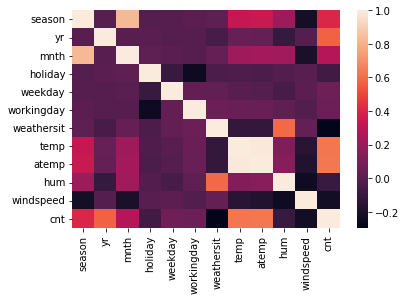

In [ ]:
#Write your code here 
sns.heatmap(bike_df.corr())

*Comment the results of the previous program* 

9) `Build 2D plots of dependences between each pair of the varibles.`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17372059d0>,
      dtype=object)

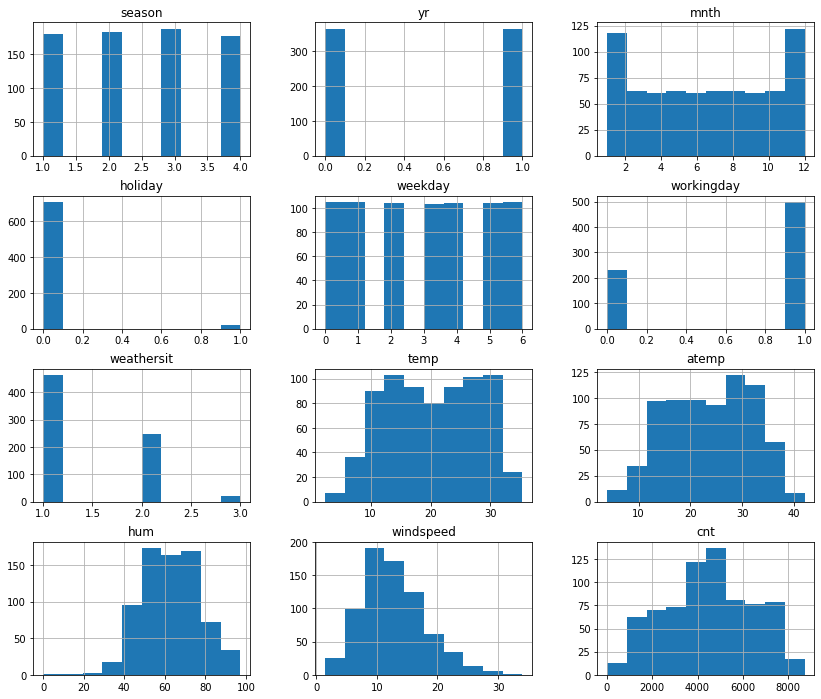

In [ ]:
#Write your code here 
bike_df.hist(figsize = (14,12))

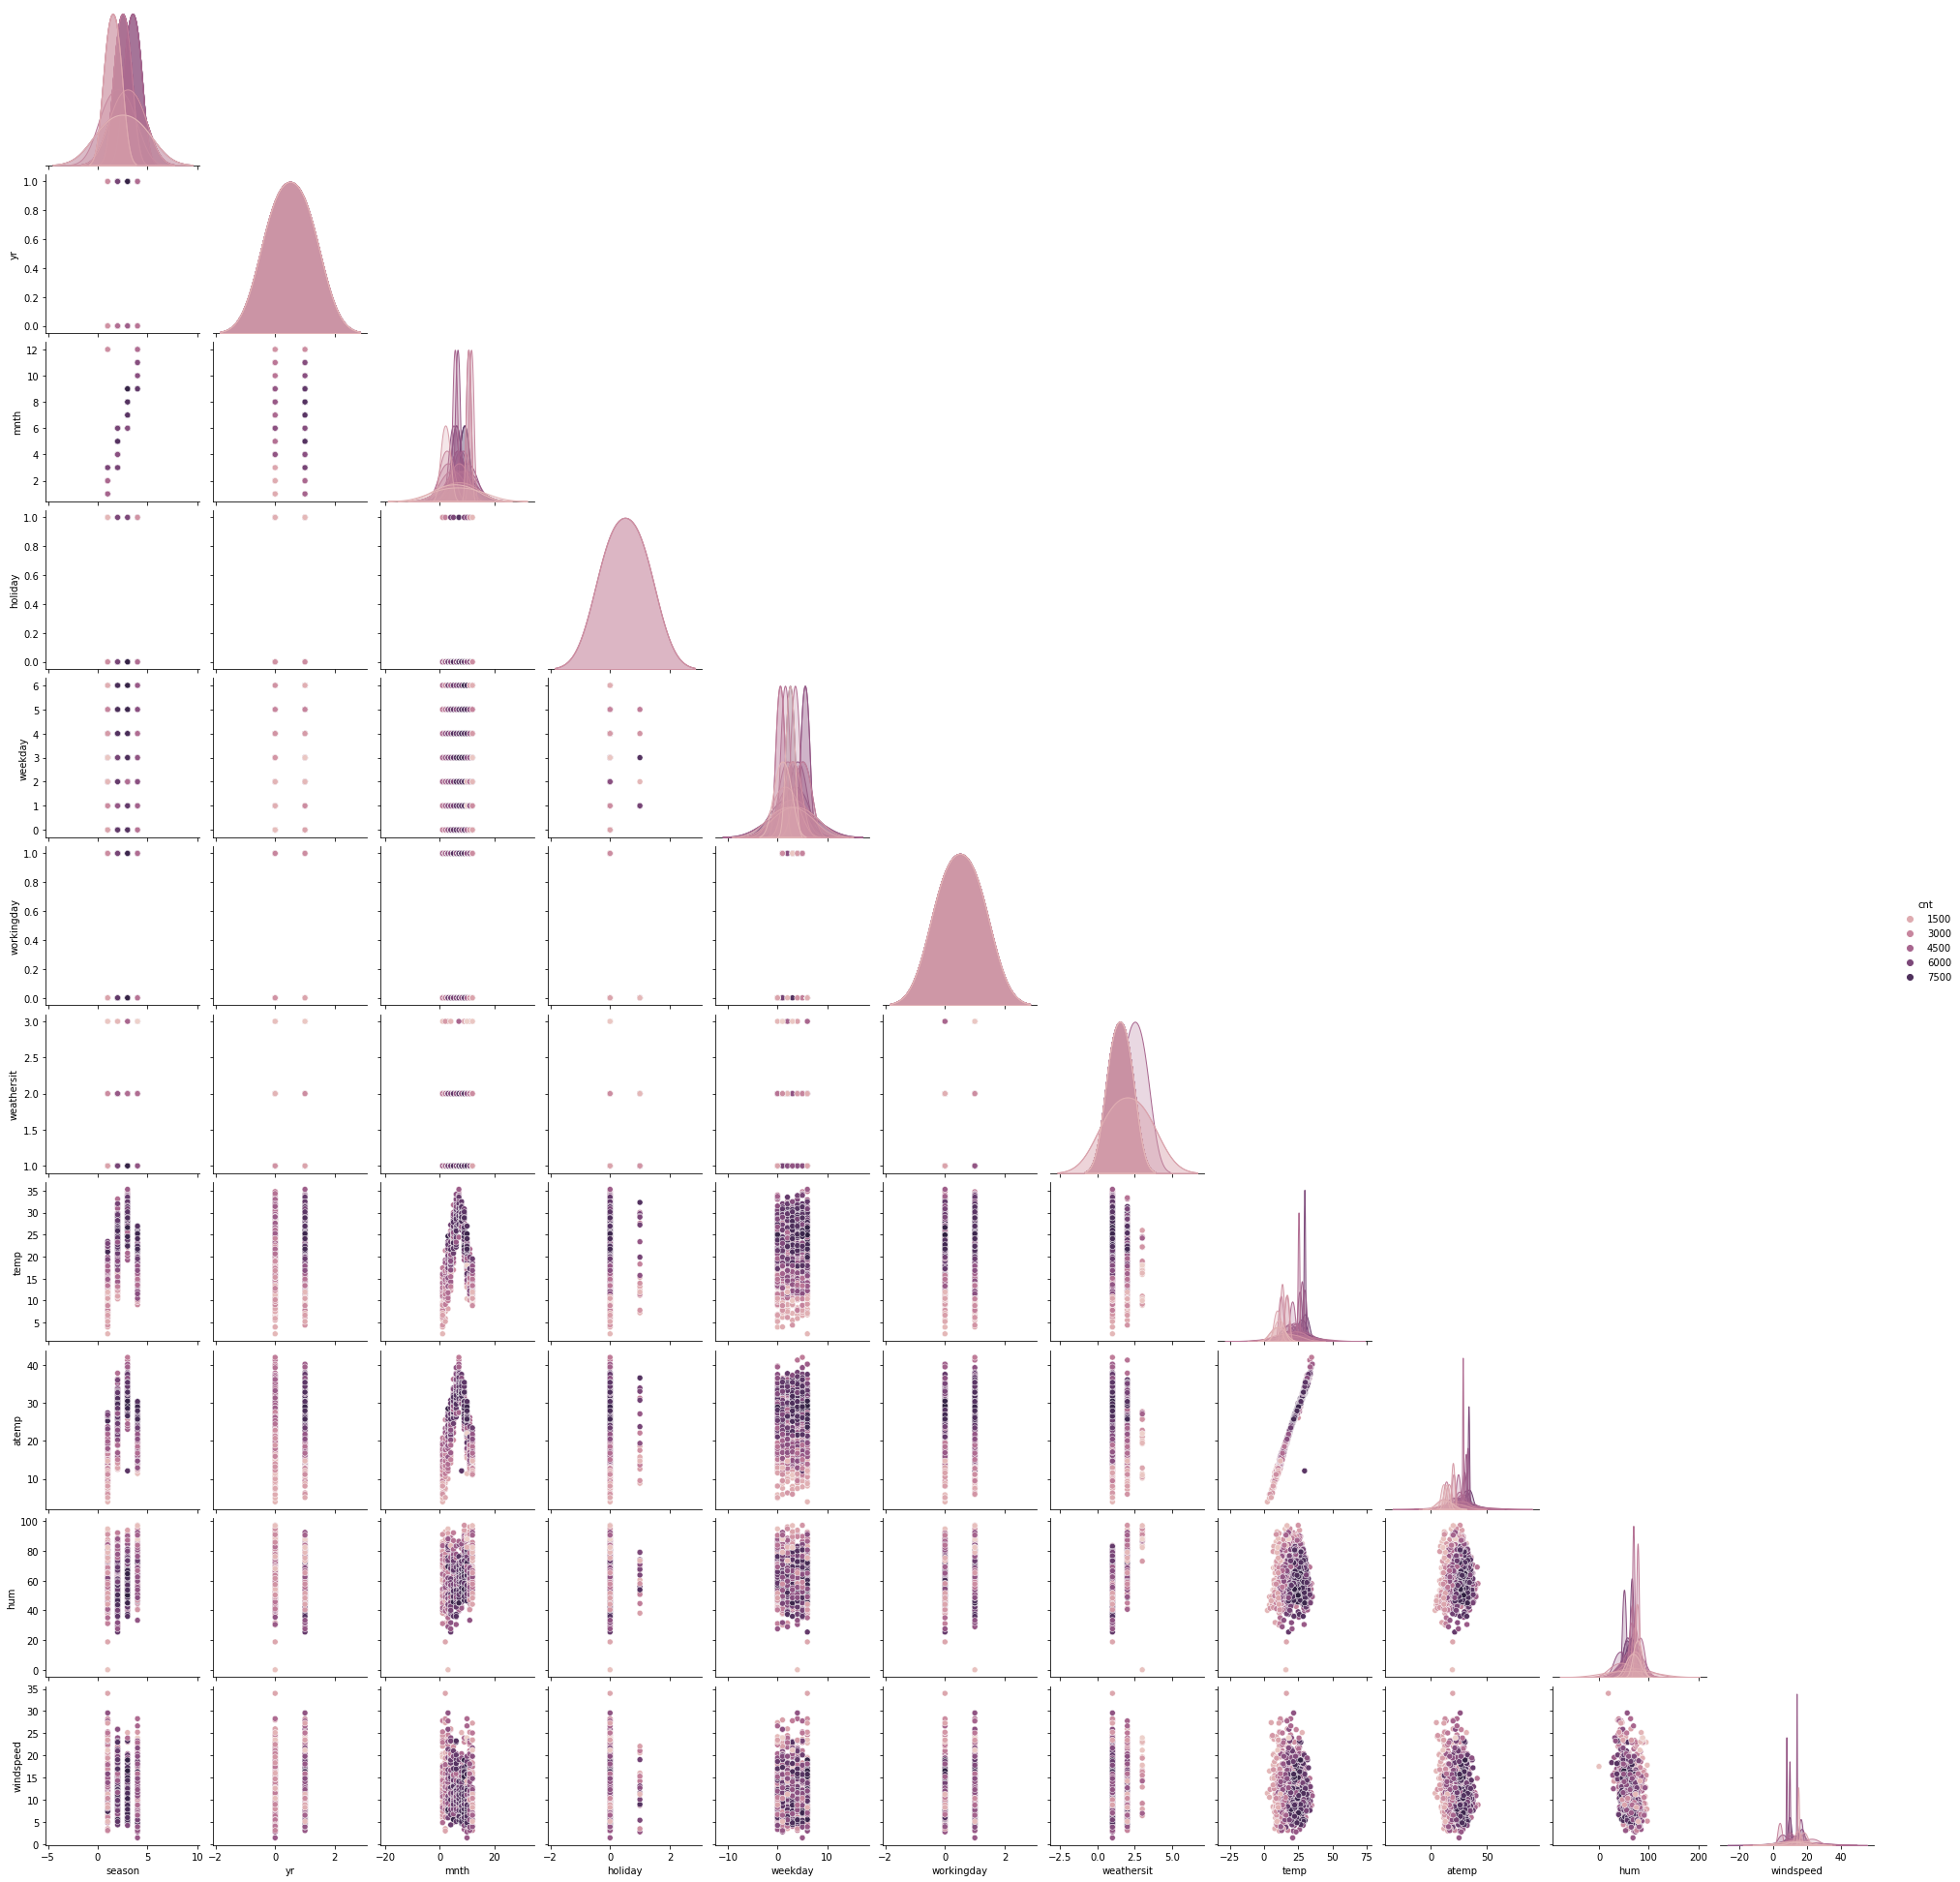

In [ ]:
sns.pairplot(bike_df,hue='cnt',corner=True)

# **`Task 2 “Data Analysis” `**

Compare 4 ML methods: 

*   Linear regression
*   Decision tree regression
*   kNN: k nearest neighbours regression
*   Support vector machine regression


1) Scale your whole dataset. Try different scalings for your dataset. (Standard Scaler, MinMax Scaler). Experiment with Standard Scaler first.

In [ ]:
#Write your code here. 
bike_df = pd.get_dummies(bike_df)
X = bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
Y = bike_df['cnt']
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state=42)
#Standard Scaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

2) Divide your dataset into 2 parts: training set and testing set (90:10). Use defined random_state to reproduce the splitting for other Scaler. Output the dimension of the resulting datasets.

In [ ]:
#Write your code here 
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state=42)

3) **Preliminary analysis:** For each model: train with training set and output the regression score (R2) of the model using training set. Now test your model with a testset and output the regression score (R2). Compare R2 inside one model for training and testing sets. Calculate other metrics MSE, RMSE, MAE, mentioned in the corresponding lecture. Compare the same characteristics calculated with training and testsets. 

**Linear model**

Accuracy of lr: 0.8014486719746297
lr coef: [ 509.82489053 2018.04676628  -43.24426373 -455.7942266    67.25844969
  150.03191668 -590.79038202  -69.55118288  183.88370649  -10.58601463
  -31.98022046]
lr Intercept Value: 1145.7675978793577
R-squared scores : 0.7889836585443868
MAE: 639.9489670297783
MSE: 785229.2386561336
RMSE: 886.1316147481331


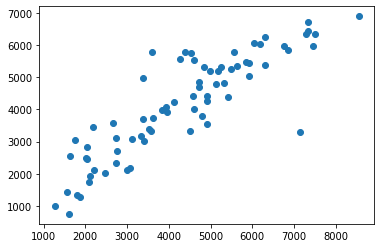

In [ ]:
#Write your code here 
classifier1 = LinearRegression()
classifier1.fit(X_train,y_train)
coeff_df = pd.DataFrame(classifier1.coef_,X.columns,columns=['Coefficient'])
y_pred = classifier1.predict(X_test)
plt.scatter(y_test,y_pred)
classifier=classifier1.score(X_train,y_train)
print("Accuracy of lr: {}\nlr coef: {}\nlr Intercept Value: {}".format(classifier,classifier1.coef_,classifier1.intercept_))

#R2 score
r2_scores = cross_val_score(classifier1, X_train, y_train, cv=10)
print('R-squared scores :',np.average(r2_scores))

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*


*   From the linear regression, we can conclude that the model is not suitable for this problem due non linearirty of data



**Decision tree regression**

Accuracy of lr: 1.0
lr Intercept Value: 1145.7675978793577
R-squared scores : 0.7856533859740957
MAE: 642.2191780821918
MSE: 805457.2328767123
RMSE: 897.4726919949778


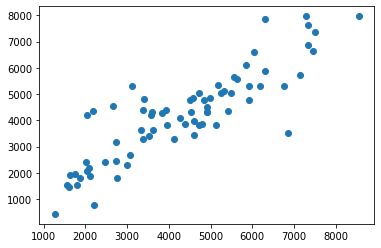

In [ ]:
#Write your code here 
classifier2 = DecisionTreeRegressor()
classifier2.fit(X_train,y_train)
y_pred = classifier2.predict(X_test)
plt.scatter(y_test,y_pred)
classifier=classifier2.score(X_train,y_train)
print("Accuracy of lr: {}\nlr Intercept Value: {}".format(classifier,classifier1.intercept_))

#R2 score
r2_scores = cross_val_score(classifier2, X_train, y_train, cv=10)
print('R-squared scores :',np.average(r2_scores))

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

**kNN: k nearest neighbours regression**

Accuracy of lr: 0.7216862967778528
lr Intercept Value: 1145.7675978793577
R-squared scores : 0.7889836585443868
MAE: 639.9489670297783
MSE: 785229.2386561336
RMSE: 886.1316147481331


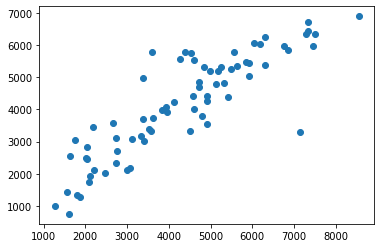

In [ ]:
#Write your code here 
classifier3 = KNeighborsRegressor()
classifier3.fit(X_train,y_train)
y_pred = classifier1.predict(X_test)
plt.scatter(y_test,y_pred)
classifier=classifier3.score(X_train,y_train)
print("Accuracy of lr: {}\nlr Intercept Value: {}".format(classifier,classifier1.intercept_))

#R2 score
r2_scores = cross_val_score(classifier1, X_train, y_train, cv=10)
print('R-squared scores :',np.average(r2_scores))

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

**Support vector machine regression**

Accuracy of lr:0.8014486719746297
lr Intercept Value: 1145.7675978793577
R-squared scores : 0.7889836585443868
MAE: 1469.1741094990196
MSE: 3156956.70452738
RMSE: 1776.782683539937


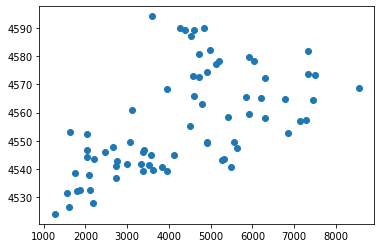

In [ ]:
#Write your code here 
classifier4 = SVR()
classifier4.fit(X_train,y_train)
y_pred = classifier4.predict(X_test)
plt.scatter(y_test,y_pred)
classifier=classifier1.score(X_train,y_train)
print("Accuracy of lr:{}\nlr Intercept Value: {}".format(classifier,classifier1.intercept_))

#R2 score
r2_scores = cross_val_score(classifier1, X_train, y_train, cv=10)
print('R-squared scores :',np.average(r2_scores))

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

Output the coefficients of the linear regression model. Which variables have the biggest influence on the output (dependent variables)? Write the conclusions in the notebook as a text field.

In [ ]:
#Write your code here 
#Coefficient of linear regression model
coeff_df = pd.DataFrame(classifier1.coef_,X.columns,columns=['Coefficient'])
print("Accuracy of lr: {}\nlr coef: {}\nlr Intercept Value: {}".format(classifier,classifier1.coef_,classifier1.intercept_))


Accuracy of lr: 0.8014486719746297
lr coef: [ 509.82489053 2018.04676628  -43.24426373 -455.7942266    67.25844969
  150.03191668 -590.79038202  -69.55118288  183.88370649  -10.58601463
  -31.98022046]
lr Intercept Value: 1145.7675978793577


*Comment the results of the previous program.*

4) Recalculate the results of Task 2 (use the same random_state as for Standard Scaler by splitting) with MinMaxScaler and compare the results based on metric R2. Use the Scaler, which gives the best results for the next Tasks.

Model: Linear Regression 


Accuracy of lr:0.8014486719746297
lr Intercept Value: 1145.7675978793577
R-squared scores : 0.7889836585443868
MAE: 674.0529994043901
MSE: 882458.2076117564
RMSE: 939.392467295622

Model: Decision Tree Regressor 


Accuracy of lr:0.8014486719746297
lr Intercept Value: 1145.7675978793577
R-squared scores : 0.7889836585443868
MAE: 693.9589041095891
MSE: 1002984.2876712328
RMSE: 1001.4910322470356

Model: KNN Regressor 


Accuracy of lr:0.8014486719746297
lr Intercept Value: 1145.7675978793577
R-squared scores : 0.7889836585443868
MAE: 486.84931506849307
MSE: 445500.86904109584
RMSE: 667.4585148465003

Model: SVR 


Accuracy of lr:0.8014486719746297
lr Intercept Value: 1145.7675978793577
R-squared scores : 0.7889836585443868
MAE: 1453.293103694748
MSE: 3085384.506336906
RMSE: 1756.526261214704



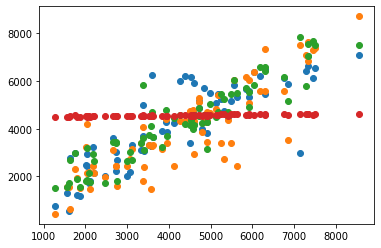

In [ ]:
#Write your code here
X_train1 = MinMaxScaler().fit_transform(X_train)
X_test1 = MinMaxScaler().fit_transform(X_test)

#Declaring different models
model_name = [
    'Linear Regression',
    'Decision Tree Regressor',
    'KNN Regressor',
    'SVR'
]

models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    SVR()
]

#Classification report and ROC
def model_train_report(model,X_train1, X_test1, y_train, y_test):
    model = model.fit(X_train1,y_train)
    y_pred = model.predict(X_test1)
    plt.scatter(y_test,y_pred)
    classifier=classifier1.score(X_train,y_train)
    print("Accuracy of lr:{}\nlr Intercept Value: {}".format(classifier,classifier1.intercept_))

    #R2 score
    r2_scores = cross_val_score(classifier1, X_train, y_train, cv=10)
    print('R-squared scores :',np.average(r2_scores))

    #MAE,MSE,RMSE
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        

for name,model in zip(model_name,models):
    print(f'Model: {name} \n\n')
    model_train_report(model,X_train1, X_test1, y_train, y_test)
    print()

*Comment the results of the previous program.*

*   Accuracy for KNN Regressor computed after MInMax Scaler has increased


*   Accuracy for Decision Tree Regressor has decreased after MinMax Scaling





# **`Task 3 “Cross validation” `**

1)	Make 5 fold cross validation, dividing your combined (training + validation sets) into 5 folds in different combinations manually with the function train_test_split() and  without using such functions as: cross_val_score(), cross_validation(), GridSearchCV(). Execute a cycle for each fold running all four models inside.

2) Find the average values for each metric for each model based on the validation set. 

3) Try different values for the hyperparameters (see corresponding lecture slides) for each model and re-run the steps 1-2. Make conclusions about the best model and best parameters, based on each metrics and based on the majority of the metrics. 



In [ ]:
#Write your code here
scores = []
def model_train_report(model,X_train, X_test, y_train, y_test):
    train_test = KFold(n_splits=5, random_state=None)
    # Manually performing cross validation
    for train_index, test_index in train_test.split(X,y): 
        print("Train:\n", train_index)
        print("\n")
        print("Validation:\n", test_index) 
        X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        score= model.score(X_train, y_train)
        scores.append(score)
    print('\n\nCross-Validation accuracy mean and Standard deviation: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
        
for name,model in zip(model_name,models):
    print(f'Model: {name} \n\n')
    model_train_report(model,X_train, X_test, y_train, y_test)
    print()

Model: Linear Regression 


Train:
 [146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343
 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361
 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379
 380 381 382 38

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegr

Train:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 24

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted



Validation:
 [292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309
 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345
 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363
 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381
 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399
 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417
 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435
 436 437]
Train:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


*Show the results of 3 runs of each model with different hyperparameters each.*

4)	**Final evaluation.** Evaluate your model using a test set (remains the same from the previous task) based on all metrics. Take the best hyperparameters of the models from the cross validation step and train the model with the complete training set (training set + validation set). Compare the results obtained on the validation set. Make the conclusions about the results.

# **`Task 4 “Use automatic cross validation ” `**

1) Use the functions cross_val_score() or cross_validation() for automation of the manually performed process in Task 3. Use the best hyperparameter values for each model found at the previous step.

In [ ]:
#Write your code here for Lenear regression
classifier1 = LinearRegression()
classifier1.fit(X_train,y_train)
y_pred = classifier1.predict(X_test)
#cross validation
r2_scores = cross_val_score(classifier1, X_train, y_train, cv=10)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.7889836585443868


In [ ]:
#Write your code here for Decision tree regression
classifier2 = DecisionTreeRegressor()
classifier2.fit(X_train,y_train)
y_pred = classifier2.predict(X_test)

#cross validation
r2_scores = cross_val_score(classifier1, X_train, y_train, cv=10)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.7889836585443868


In [ ]:
#Write your code here for #kNN: k nearest neighbours regression
classifier3 = KNeighborsRegressor()
classifier3.fit(X_train,y_train)
y_pred = classifier1.predict(X_test)

#cross validation
r2_scores = cross_val_score(classifier1, X_train, y_train, cv=10)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.7889836585443868


In [ ]:
#Support vector machine regression
classifier4 = SVR()
classifier4.fit(X_train,y_train)
y_pred = classifier4.predict(X_test)

#cross validation
r2_scores = cross_val_score(classifier1, X_train, y_train, cv=10)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.7889836585443868


*!! Comment the obtained results here !!*

*   Similar cross validation score for all the models



2) Use the function GridSearchCV() to find the best hyperparameters for each ML method.

In [ ]:
#Write your code here for Linear regression
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [1000,2000,3000]
    }
]
clf = GridSearchCV(LogisticRegression(), param_grid=param_grid,cv = 5)
best_clf = clf.fit(X,y)
best_clf.best_params_

In [ ]:
#Write your code here for Decision tree regression
param_ = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,15),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

print('-----Best Parameters-----')
grid1 = GridSearchCV(DecisionTreeClassifier(),param_grid=param_, cv=5, verbose=1, n_jobs=-1)
g_results1 = grid1.fit(X_train, y_train)
print('-----Best Parameters-----')
print("Best Score: " , g_results1.best_score_)
print("Best Params: " , g_results1.best_params_)

In [ ]:
#Write your code here for #kNN: k nearest neighbours regression
# Hyper parameter tuning for Kneighbors classifier
grid_params = {
    'n_neighbors': [3,5,7,9,11,13,15,17,19,21,23],
    'p': (1,2),
    'weights':['uniform', 'distance'],
    'metric':['euclidean','manhattan', 'minkowski']
}
g = GridSearchCV(KNeighborsClassifier(algorithm='auto'), 
    grid_params,
    verbose=1,
    cv=3,
    n_jobs=-1
)
print('-----Best Parameters-----')
g_results = g.fit(X_train, y_train)
print("Best Score: " , g_results.best_score_)
print("Best Estimator: " , g_results.best_estimator_)
print("Best Params: " , g_results.best_params_)

In [ ]:
#Write your code here for Support vector machine regression
svm = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm,param_grid)
g_results = grid.fit(X_train,y_train)
print("Best Estimator: " , g_results.best_estimator_)
print("Best Params: " , g_results.best_params_)

*!! Comment the obtained results here !!*

3) Evaluate the found models and parameters with the test dataset. Compare the results of Tasks 3 and Task4. Make conclusion about the results.

In [ ]:
#Write your code here Linear regression
classifier1 = LinearRegression()
classifier1.fit(X_train,y_train)
y_pred = classifier1.predict(X_test)

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 639.9489670297783
MSE: 785229.2386561336
RMSE: 886.1316147481331


In [ ]:
#Write your code here for Decision tree regression
classifier2 = DecisionTreeRegressor()
classifier2.fit(X_train,y_train)
y_pred = classifier2.predict(X_test)

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 594.2328767123288
MSE: 625768.4794520548
RMSE: 791.0552948132355


In [ ]:
#Write your code here for #kNN: k nearest neighbours regression
classifier3 = KNeighborsRegressor()
classifier3.fit(X_train,y_train)
y_pred = classifier1.predict(X_test)

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 639.9489670297783
MSE: 785229.2386561336
RMSE: 886.1316147481331


In [ ]:
#Write your code here for Support vector machine regression 
classifier4 = SVR()
classifier4.fit(X_train,y_train)
y_pred = classifier4.predict(X_test)

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1469.1741094990196
MSE: 3156956.70452738
RMSE: 1776.782683539937


*!! Comment the obtained results here !!*

*   MAE - Highest for SVR
*   MSE - Highest for both linear regression and KNN regression


*   RMSE - Highest for SVR





4) Output residuals (true value - forecast) and order them. Which observations could be outliers?  Compare the outliers of all the models. Are they the same? 

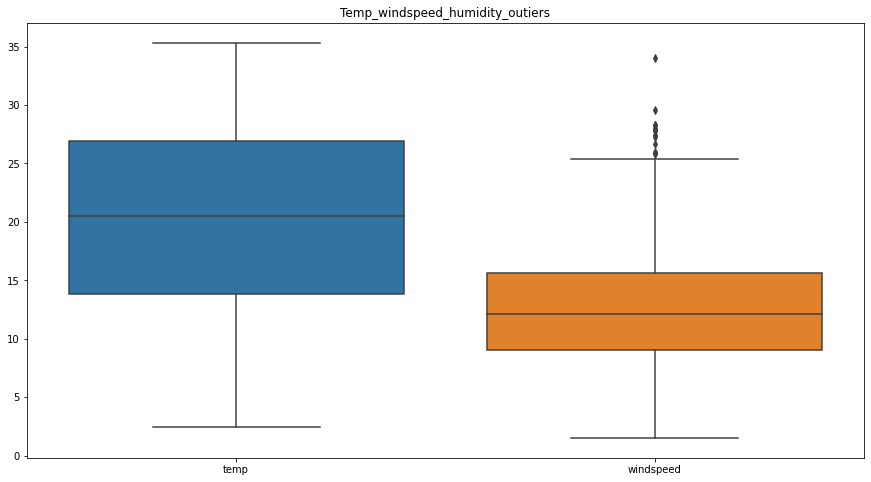

In [ ]:
#Write your code here to output the outliers for all four models as a DataFrame.
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_outliers
sns.boxplot(data=bike_df[['temp','windspeed']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

5) Try to exclude those observations and rebuild each model (use cross_validation() function ones more). Compare the results after removing and before removing of outliers. Make conclusions.

Accuracy of lr: 0.8014486719746297
lr coef: [ 509.82489053 2018.04676628  -43.24426373 -455.7942266    67.25844969
  150.03191668 -590.79038202  -69.55118288  183.88370649  -10.58601463
  -31.98022046]
lr Intercept Value: 1145.7675978793577
R-squared scores : 0.7889836585443868
MAE: 639.9489670297783
MSE: 785229.2386561336
RMSE: 886.1316147481331


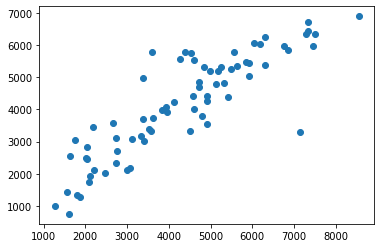

In [ ]:
#Write your code here for #Linear model after removing of outliers
classifier1 = LinearRegression()
classifier1.fit(X_train,y_train)
coeff_df = pd.DataFrame(classifier1.coef_,X.columns,columns=['Coefficient'])
y_pred = classifier1.predict(X_test)
plt.scatter(y_test,y_pred)
classifier=classifier1.score(X_train,y_train)
print("Accuracy of lr: {}\nlr coef: {}\nlr Intercept Value: {}".format(classifier,classifier1.coef_,classifier1.intercept_))

#R2 score
r2_scores = cross_val_score(classifier1, X_train, y_train, cv=10)
print('R-squared scores :',np.average(r2_scores))

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy of lr: 1.0
lr Intercept Value: 1145.7675978793577
R-squared scores : 0.7707497191127177
MAE: 630.8904109589041
MSE: 738096.095890411
RMSE: 859.1251922103152


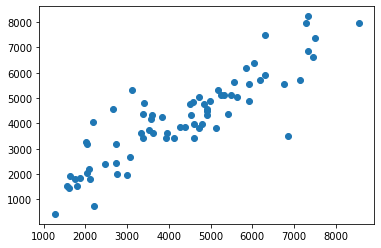

In [ ]:
#Write your code here for Decision tree regression after removing of outliers
classifier2 = DecisionTreeRegressor()
classifier2.fit(X_train,y_train)
y_pred = classifier2.predict(X_test)
plt.scatter(y_test,y_pred)
classifier=classifier2.score(X_train,y_train)
print("Accuracy of lr: {}\nlr Intercept Value: {}".format(classifier,classifier1.intercept_))

#R2 score
r2_scores = cross_val_score(classifier2, X_train, y_train, cv=10)
print('R-squared scores :',np.average(r2_scores))

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy of lr: 0.7216862967778528
lr Intercept Value: 1145.7675978793577
R-squared scores : 0.7889836585443868
MAE: 639.9489670297783
MSE: 785229.2386561336
RMSE: 886.1316147481331


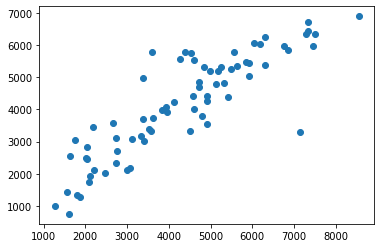

In [ ]:
#Write your code here for kNN: k nearest neighbours regression after removing of outliers
classifier3 = KNeighborsRegressor()
classifier3.fit(X_train,y_train)
y_pred = classifier1.predict(X_test)
plt.scatter(y_test,y_pred)
classifier=classifier3.score(X_train,y_train)
print("Accuracy of lr: {}\nlr Intercept Value: {}".format(classifier,classifier1.intercept_))

#R2 score
r2_scores = cross_val_score(classifier1, X_train, y_train, cv=10)
print('R-squared scores :',np.average(r2_scores))

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy of lr:0.8014486719746297
lr Intercept Value: 1145.7675978793577
R-squared scores : 0.7889836585443868
MAE: 1469.1741094990196
MSE: 3156956.70452738
RMSE: 1776.782683539937


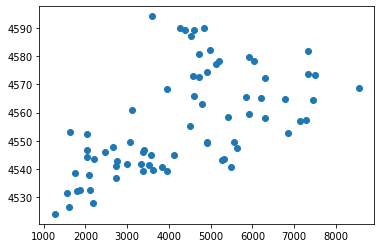

In [ ]:
#Write your code here for Support vector machine regression after removing of outliers
classifier4 = SVR()
classifier4.fit(X_train,y_train)
y_pred = classifier4.predict(X_test)
plt.scatter(y_test,y_pred)
classifier=classifier1.score(X_train,y_train)
print("Accuracy of lr:{}\nlr Intercept Value: {}".format(classifier,classifier1.intercept_))

#R2 score
r2_scores = cross_val_score(classifier1, X_train, y_train, cv=10)
print('R-squared scores :',np.average(r2_scores))

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

!! Make conclusions as a Text field !!

*   Significant improvement in accuracy is observed after the removal of outlier

